In [1]:
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier


In [2]:
df = pd.read_csv('../data/processed/german_credit_data_preprocessed_final.csv')
df

,Age,Job,Saving accounts,Checking account,Credit amount,Duration,Risk,Sex_male,Housing_own,Housing_rent,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others
0,2.766456,2,1,1,-0.745131,-1.236478,1,1,1,0,0,0,0,0,1,0,0
1,-1.191404,2,1,2,0.949817,2.248194,0,0,1,0,0,0,0,0,1,0,0
2,1.183312,1,1,1,-0.416562,-0.738668,1,1,1,0,0,0,1,0,0,0,0
3,0.831502,2,1,1,1.634247,1.750384,1,1,0,0,0,0,0,1,0,0,0
4,1.535122,2,1,1,0.566664,0.256953,0,1,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-0.399832,1,1,1,-0.544162,-0.738668,1,0,1,0,0,0,0,1,0,0,0
996,0.391740,3,1,1,0.207612,0.754763,1,1,1,0,1,0,0,0,0,0,0
997,0.215835,2,1,1,-0.874503,-0.738668,1,1,1,0,0,0,0,0,1,0,0
998,-1.103451,2,1,1,-0.505528,1.999289,0,1,0,0,0,0,0,0,1,0,0


In [ ]:
X = df.drop('Risk', axis=1)
y= df['Risk']
X_train, X_test, y_train, y_test = train_test_split(
    X,y,
    test_size = 0.2,
    random_state=42,
    stratify = y # ensure class distribution is maitained in test and train sets

)

In [14]:
models ={
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42), 
}

In [11]:
df.shape

(1000, 17)

Logistic Regression Accuracy: 0.7000
              precision    recall  f1-score   support

           0       0.50      0.20      0.29        60
           1       0.73      0.91      0.81       140

    accuracy                           0.70       200
   macro avg       0.61      0.56      0.55       200
weighted avg       0.66      0.70      0.65       200



/Users/mihai/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: divide by zero encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/mihai/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: overflow encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/mihai/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: invalid value encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/mihai/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_linear_loss.py:330: RuntimeWarning: divide by zero encountered in matmul
  grad[:n_features] = X.T @ grad_pointwise + l2_reg_strength * weights
/Users/mihai/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_linear_loss.py:330: RuntimeWarning: overflow encountered in matmul
  grad[:n_features] = X.T @ grad_pointwise + l2_reg_s

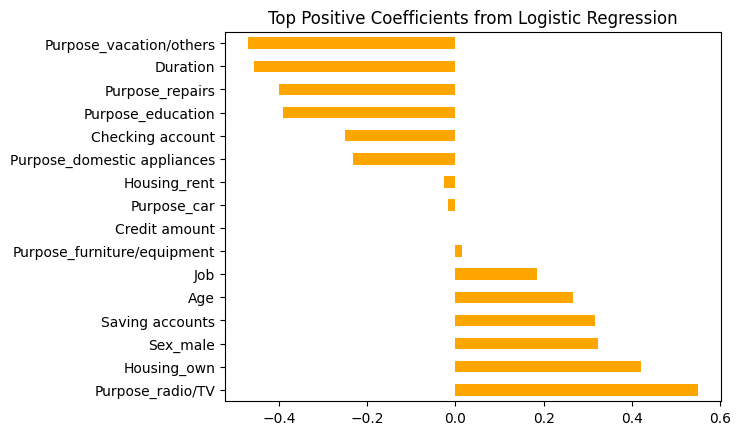

Random Forest Accuracy: 0.7050
              precision    recall  f1-score   support

           0       0.51      0.32      0.39        60
           1       0.75      0.87      0.81       140

    accuracy                           0.70       200
   macro avg       0.63      0.59      0.60       200
weighted avg       0.68      0.70      0.68       200



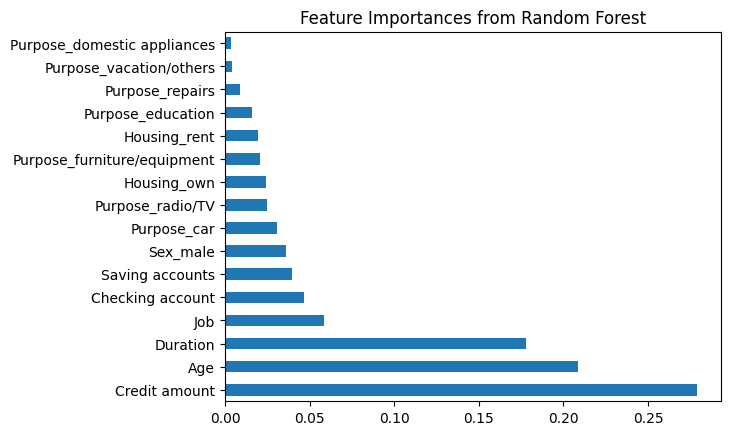

In [15]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
for name, model in models.items():
    model.fit(X_train, y_train)
    accuracy = model.score(X_test, y_test)

    print(f'{name} Accuracy: {accuracy:.4f}')
    y_pred = model.predict(X_test)
    print(classification_report(y_test,y_pred))

    if name == 'Random Forest':
        importances = pd.Series(model.feature_importances_, index=X.columns)
        importances.nlargest(17).plot(kind='barh')
        plt.title('Feature Importances from Random Forest')
        plt.show()
    elif name == 'Logistic Regression':
        coefficients = pd.Series(model.coef_[0], index=X.columns)
        coefficients.nlargest(17).plot(kind='barh', color='orange')
        plt.title('Top Positive Coefficients from Logistic Regression')
        plt.show()


In [21]:
# Grid Search 

from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50,100,150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2,5,10]
}

grid = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=5
)

grid.fit(X_train, y_train)
best_model = grid.best_estimator_
print(classification_report(y_test, best_model.predict(X_test)))
print(best_model.score(X_test,y_test))

              precision    recall  f1-score   support

           0       0.57      0.27      0.36        60
           1       0.74      0.91      0.82       140

    accuracy                           0.72       200
   macro avg       0.66      0.59      0.59       200
weighted avg       0.69      0.72      0.68       200

0.72


In [22]:
import joblib
joblib.dump(best_model, '../models/best_random_forest_model.pkl')

['../models/best_random_forest_model.pkl']